# 从全连接层到卷积
卷积神经网络是机器学习利用自然图像中一些已知结构的创造性方法。

## 不变性
假设我们想从一张图片中找到某物体。合理的假设是：无论哪种方法找到这个物体，都应该与这个物体的位置无关。

系统应该可以利用一些常识去识别他们。

卷积神经网络正事将空间不变性的这一概念系统化，从而基于这个模型使用较少的参数来学习有用的表示。

总结一下
1. 平移不变性(translation invariance)：不管检测对象出现在图像中的哪个位置，神经网络的前面几层应该对相同的图像区域具有相似的反应，即为平移不变性。
1. 局部性(locality)： 神经网络的前面几层应该之探索输入图像的局部区域。而不过度在意图像中相隔较远区域的关系。这就是'局部性'原则。最终，可以聚合这些局部特征，以在整个图像级别进行预测。

看一下这些原则是如何转换成数学表示的。

## 多层感知机的限制
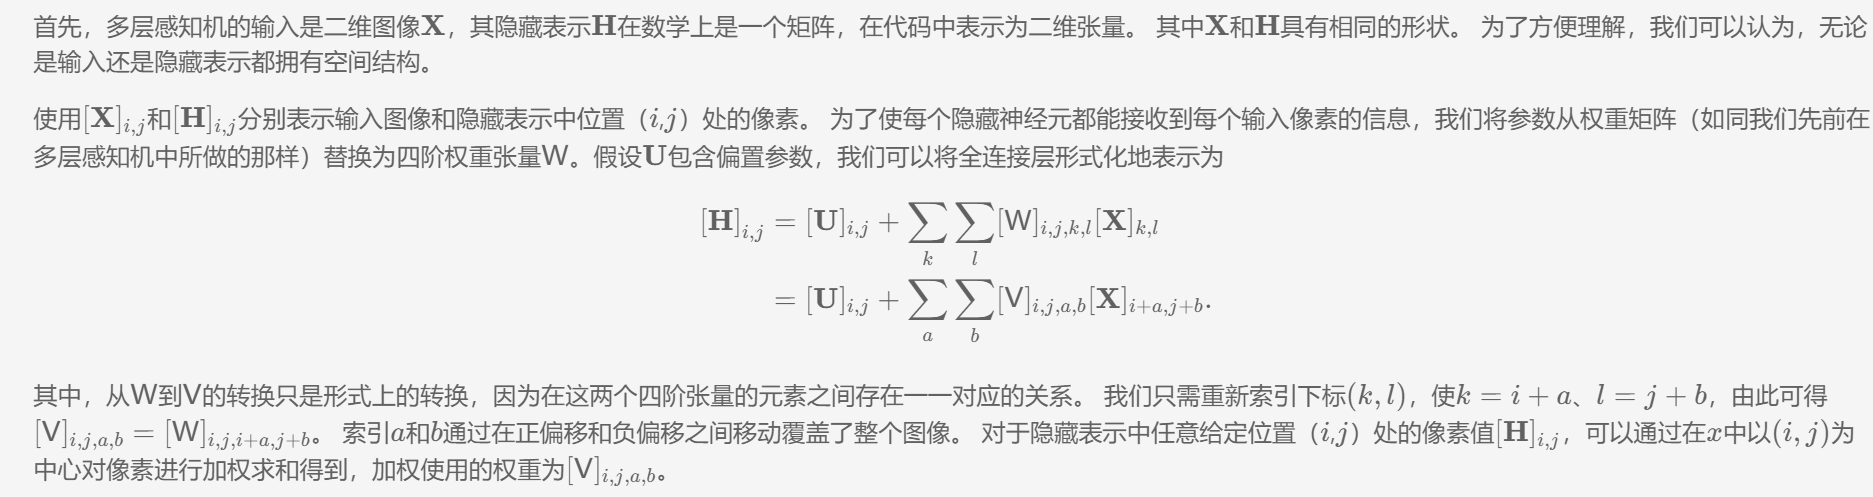

## 平移不变性
检测对象在输入 $X$ 中平移，应该仅导致隐藏表示 $H$ 中的平移。也就是说， $V$ 和 $\mathbf{U}$ 实际上不依赖 $(i, j)$ 的值， 即 $[V]_{i, j, a, b} = [\mathbf{V}]_{a,b}$。并且 $\mathbf{U}$ 是一个常数，比如 $u$ 。因此， 我们可以简化 $[\mathbf{H}]_{i, j}$ 定义为：
$$
    [\mathbf{H}]_{i, j} = u + \sum_{a} \sum_{b} [\mathbf{V}]_{a,b} [\mathbf{X}]_{i+a,j+b}.
$$

## 局部性
为了收集用来训练参数 $[\mathbf{H}_{i, j}]$ 的相关信息，我们不应偏离到距 $(i, j)$ 很远的地方。这意味着在 $|a|> \Delta$ 或 $|b|> \Delta$ 的范围之外，我们设置 $[\mathbf{V}_{a, b}] = 0$, 因此我们可以将 $[\mathbf{H}_{i, j}]$ 重写为
$$
    [\mathbf{H}]_{i, j} = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.
$$
:eqlable:`eq_conv-layer`

简而言之，:eqlable:`eq_conv-layer`是一个卷积层，而卷积神经网路是包含卷积层的一类特殊的神经网络。$\mathbf{V}$ 被称为卷积核(convolution kernel)或者滤波器(filter)，亦或简单地被称为该卷积层的权重，通常该权重是可以学习的参数。

## 卷积
回顾一下上面的操作为什么被称之为卷积。在数学中，两个函数（比如 $f, g: \mathbb{R}^d \to \mathbb{R}$）之间的“卷积”被定义为
$$
    (f * g)(\mathbf{x}) = \int f(\mathbf{z}) g(\mathbf{x} - \mathbf{z} ) d\mathbf{z}.
$$
卷积是当把一个函数翻转并且移位 $\mathbf{x}$ 时，测量$f$和$g$之间的重叠。
当为离散对象时，积分就变成了求和。例如，对于由索引为$\mathbb{Z}$的、平方可和的、无限维向量集合中抽取的向量，我们可以得到如下定义：
$$
    (f * g)(i) = \sum_a f(a) g(i - a).
$$
对于二维张量，则为$f$的索引$(a, b)$和$g$的索引$(i - a, j - b)$上的对应加权和：
$$
    (f * g)(i, j) = \sum_a \sum_b f(a, b) g(i - a, j - b). 
$$

## 通道
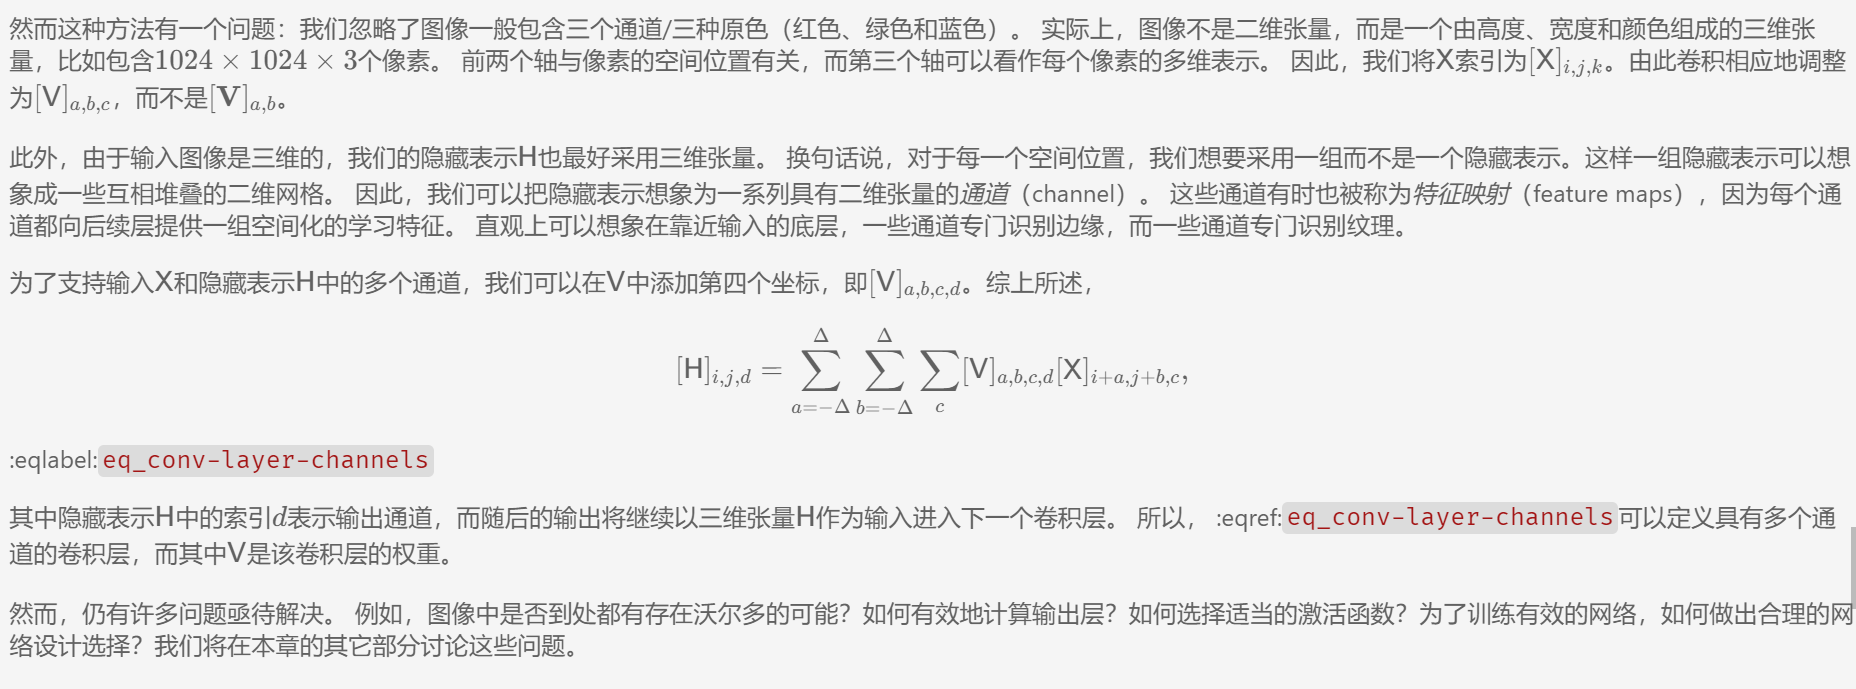